In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

#### 1.1a Load the data

In [2]:
### Your code here
# Load the data csv file
data = pd.read_csv("SeoulBikeData.csv")

# Show the data last 5 rows
data.tail()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43.0,1.3,1909,-9.3,0,0,0,Autumn,No Holiday,Yes


By observing the data from printing the last five rows (`data.tail()`), we can see there are **3 categorical features**: ***Seasons, Holiday, Functioning Day*** and the rest are numbers

**Now we duplicate the dataset to visualise the dataset and show the dtype information**

In [3]:
# Duplicate the data for later use on original version  
data_ver2 = data.copy()

# Show the properties of features
data_ver2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### 1.1b Visualization of the dataset

As discussed above, ***Seasons, Functioning Day*** and ***Holiday*** are three columns including texts. Thus, it is more appropriate to show the percentage of each elements in each feature

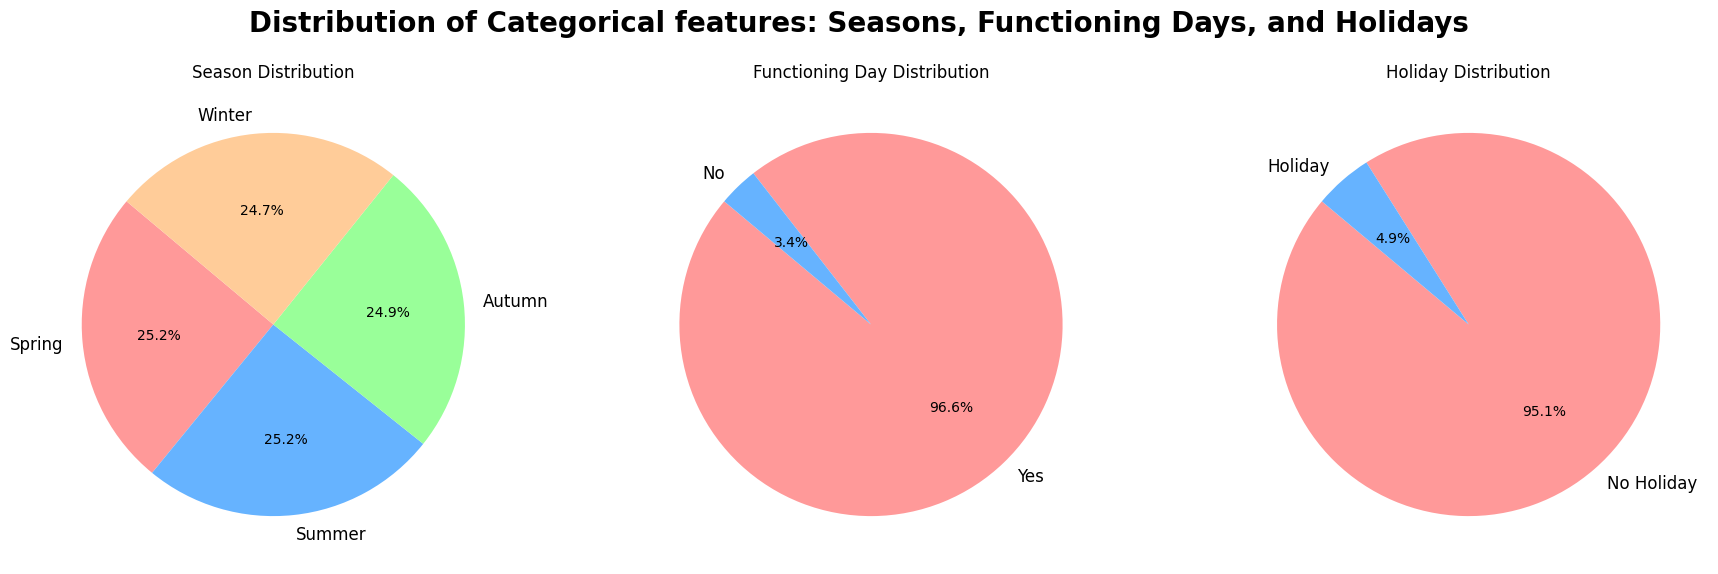

In [4]:
# Using pie chart to describe the categorical feature: Seasons, Functioning Days, Holidays
# Since the three features include text
def pie_chart_plot(feature, title, subplot_index, total_subplots):
    # calculates the frequency of each unique value in the specified column
    feature_count = data_ver2[feature].value_counts()
    # Define custom color
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76d7c4','#ff7f50','#deb887']
    # Plot the subplot and define the pie
    plt.subplot(1, total_subplots, subplot_index)  # 1 row, total_subplots columns, current subplot
    plt.pie(feature_count, labels=feature_count.index, autopct='%1.1f%%', startangle=140,
            colors=colors[:len(feature_count)])
    plt.title(title)

# Plot multiple pie charts in a single line
plt.figure(figsize=(18, 6))  # Adjust the figure size to fit all pie charts in a row

plt.suptitle("Distribution of Categorical features: Seasons, Functioning Days, and Holidays", fontsize=20, fontweight='bold')

# Plot each pie chart with the updated function
pie_chart_plot('Seasons', "Season Distribution", 1, 3)
pie_chart_plot('Functioning Day', 'Functioning Day Distribution', 2, 3)
pie_chart_plot('Holiday', 'Holiday Distribution', 3, 3)

# Adjust layout to prevent overlap and to fit the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

Moreover, as we observe the data types of features from `data_ver2.info()`, apart from ***Seasons, Functioning day, Holiday***, there are also object dtype columns such as: ***Date, Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)***. Despite being object-type (normally will be considered as categorical features), the values shown in each feature are numbers (also called numerical feature).

Therefore, in next step, the code lines aims to convert ***Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)*** back to numerical feature using `pd.to_numeric()`. The ***date*** columns will be handled to transferred back to the right dtype later.

In [5]:
# List columns need converting
numerical_features = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Convert to numerical values
for feature in numerical_features:
    data_ver2[feature] = pd.to_numeric(data_ver2[feature], errors='coerce')

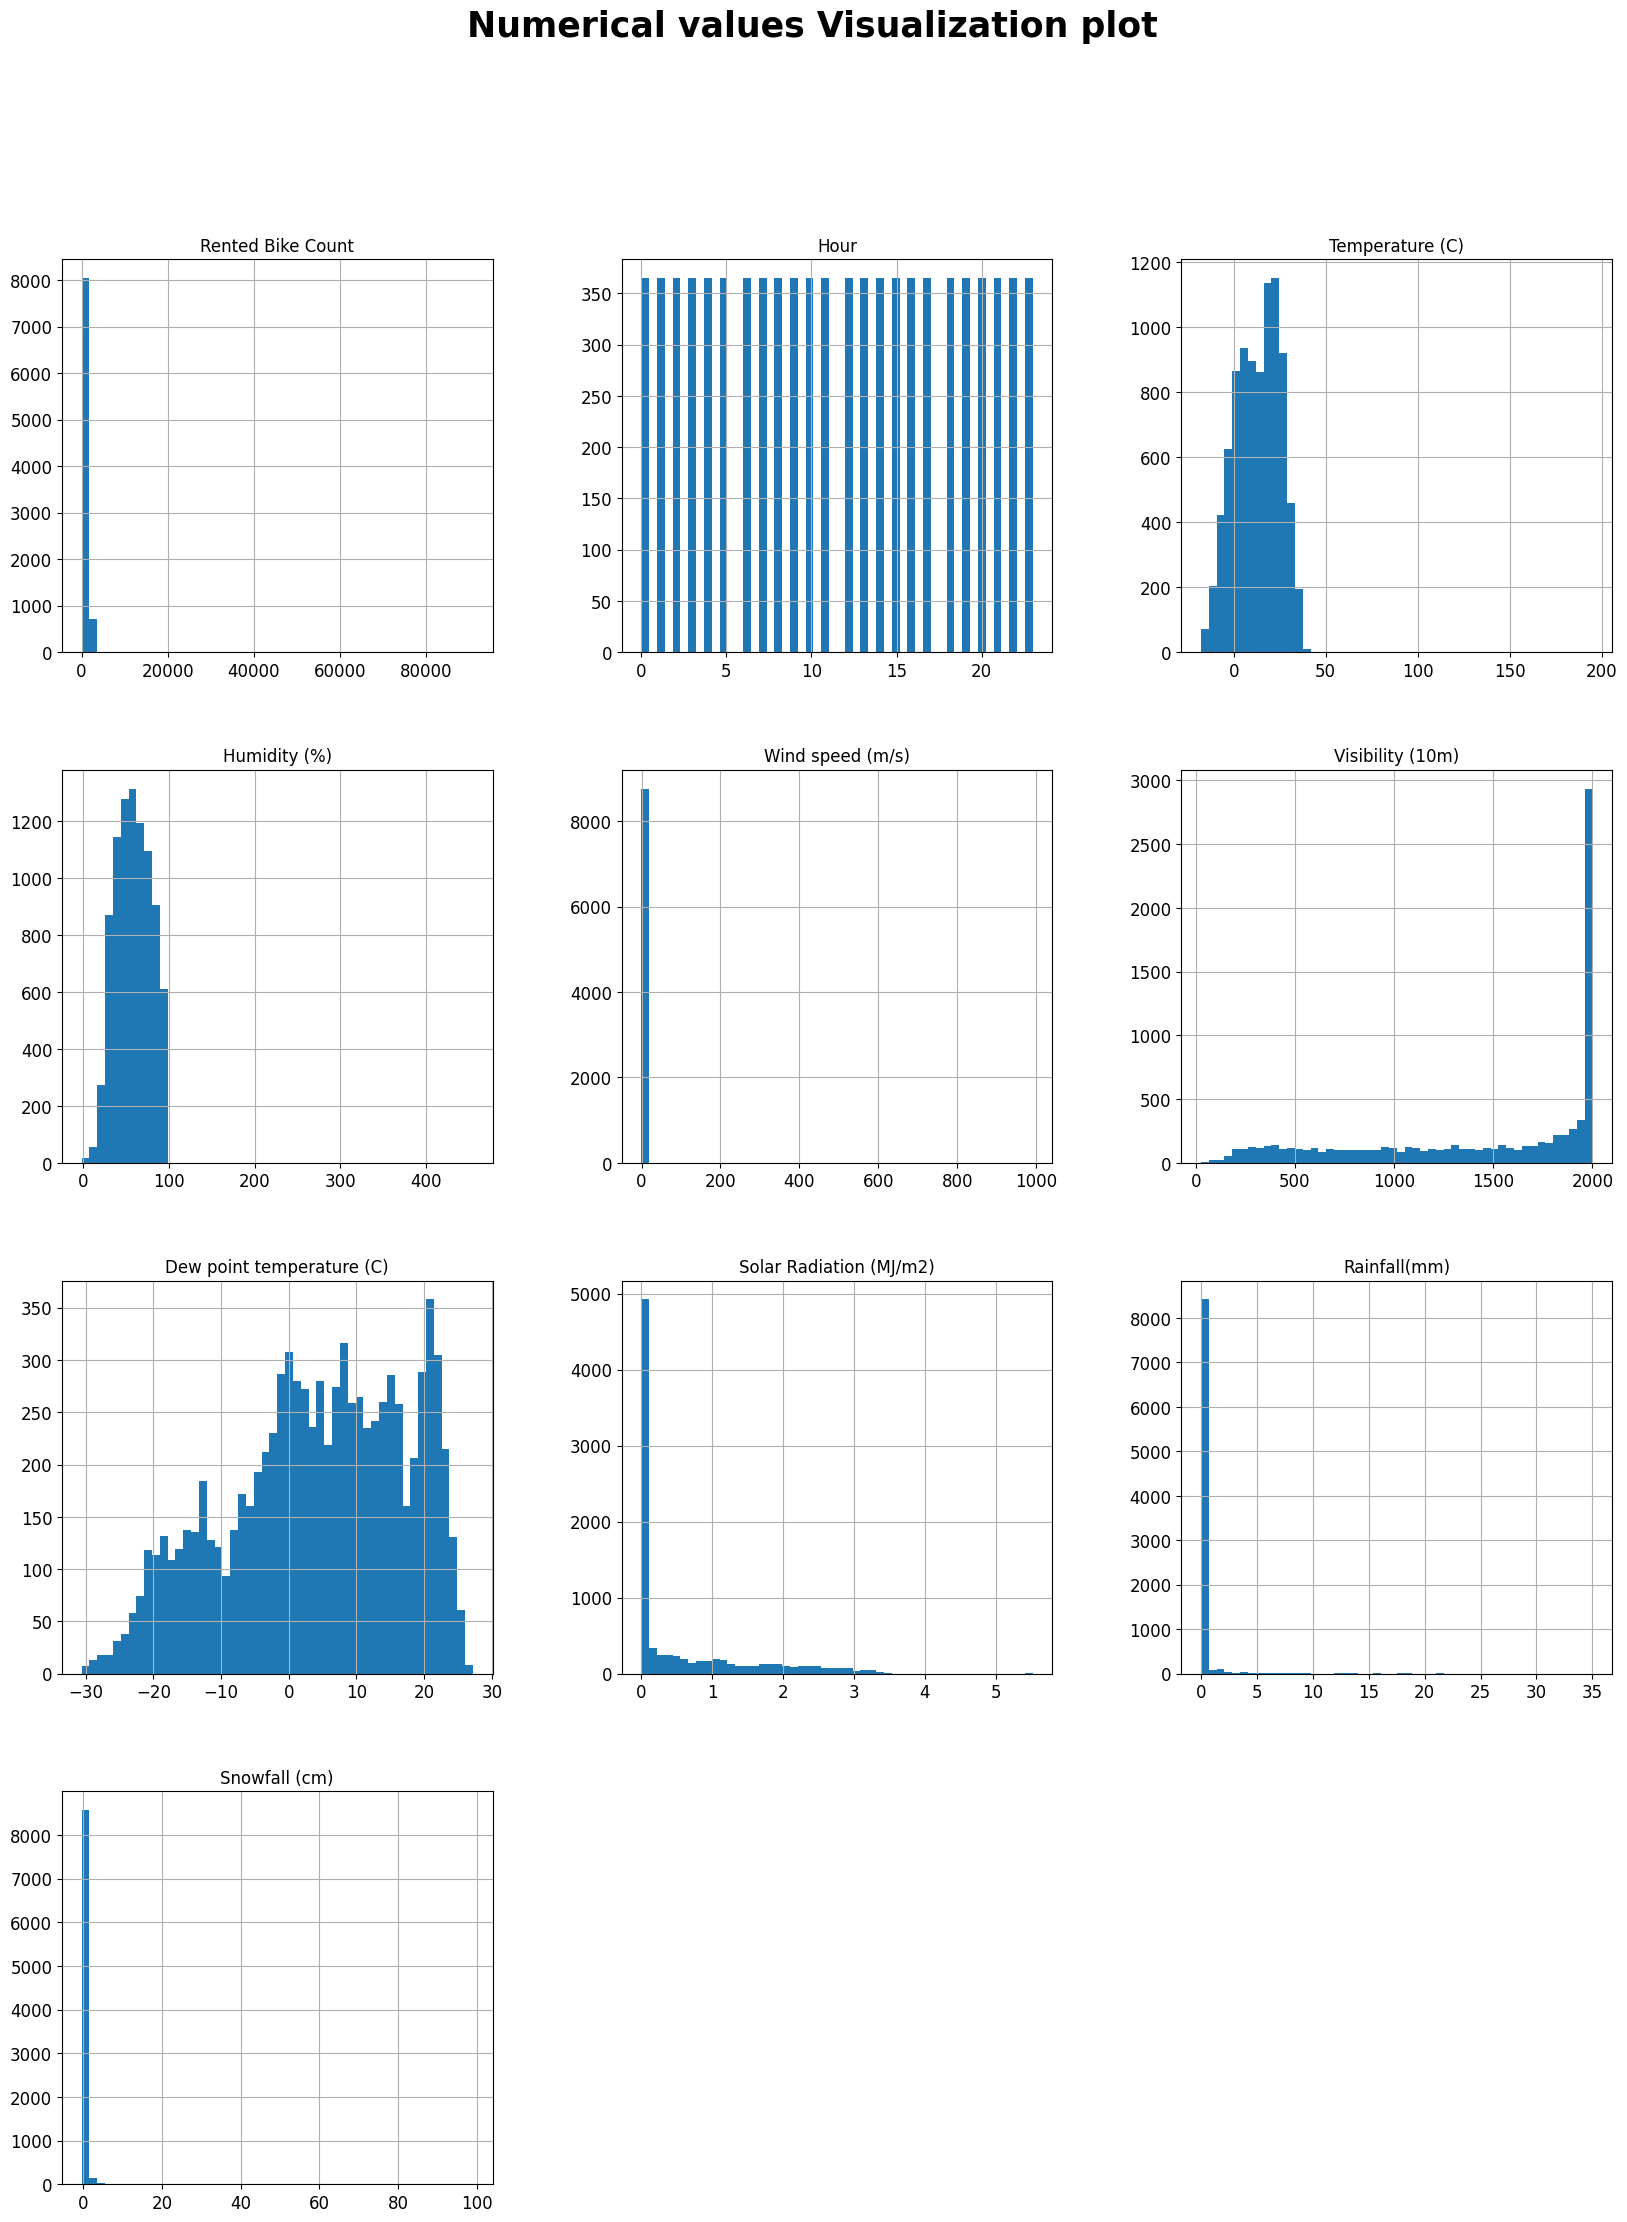

In [6]:
# Plot the numerical feature
data_ver2.hist(bins=50, figsize = (20,25))
plt.suptitle('Numerical values Visualization plot', fontsize = 25, fontweight='bold')
plt.show()

**As mentioned above, ***Date*** is converted back to dtype datetime using `pd.to_datetime()`**

In [7]:
# Convert date feature to the datetime dtype
data_ver2['Date'] = pd.to_datetime(data_ver2['Date'], dayfirst= True)

To visualise the date in the most efficient way, we count ***the occurences of each date*** (using `.value_counts()`) to see the distribution of dates of the dataset and group the number of ***Rented Bike Count*** by each date using `.groupby().sum()` to see the number of bikes rented on each day

In [8]:
# Count the number of apperances of each dated across the data
date_counts = data_ver2['Date'].value_counts().sort_index()
date_counts

Date
2017-12-01    24
2017-12-02    24
2017-12-03    24
2017-12-04    24
2017-12-05    24
              ..
2018-11-26    24
2018-11-27    24
2018-11-28    24
2018-11-29    24
2018-11-30    24
Name: count, Length: 365, dtype: int64

As briefly observed, the data is evenly distributed in the number of dates recorded with the appearance of each is 24

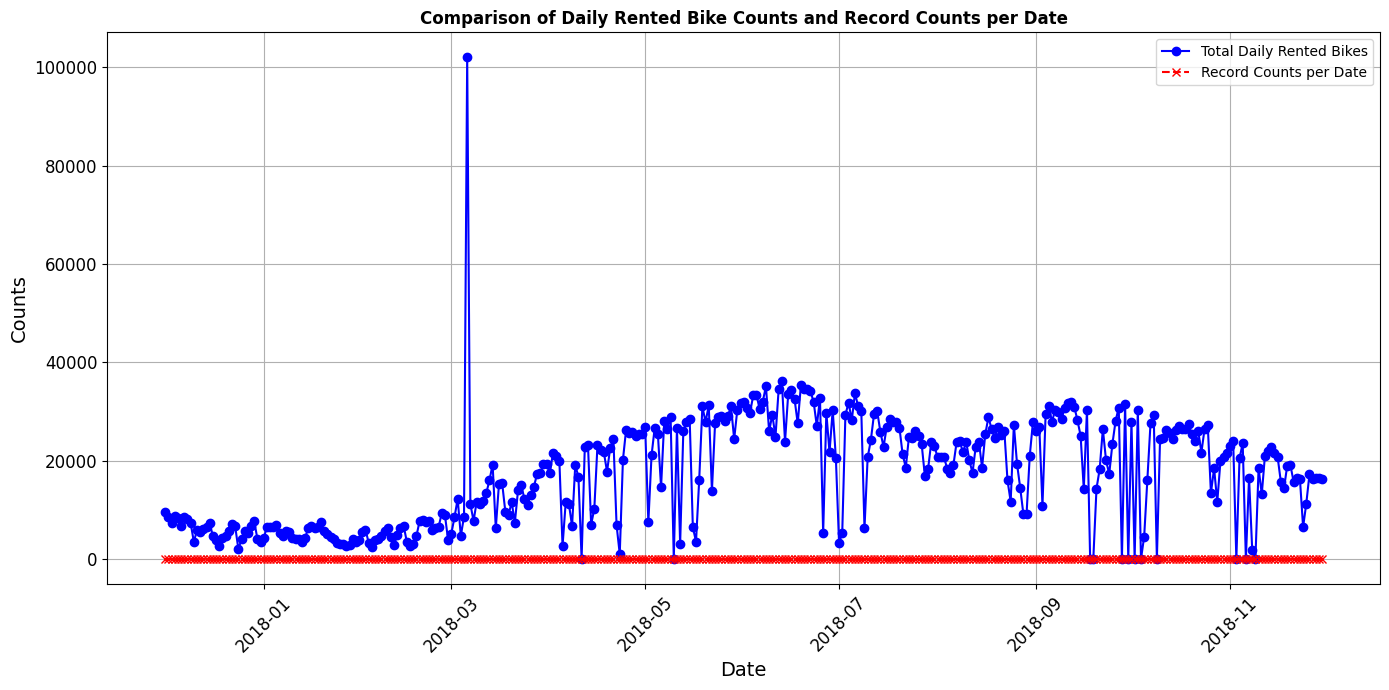

In [9]:
# Visualise the distribution of the number of dates recorded and the bikes rented on each day

# Group the number of Rented Bike count by date
daily_bike_counts = data_ver2.groupby('Date')['Rented Bike Count'].sum()

# Visualise using time series
plt.figure(figsize=(14, 7))
plt.plot(daily_bike_counts, marker='o', linestyle='-', color='b', label='Total Daily Rented Bikes')
plt.plot(date_counts, marker='x', linestyle='--', color='r', label='Record Counts per Date')
plt.title('Comparison of Daily Rented Bike Counts and Record Counts per Date', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The time series inform us that the normal number of bikes rented per day is from 0 to 4000. However, there is a day when the number exceeds enormously and reaches 100000. This can be doubtedly an outlier which may be handled later to achieve a better prediction model

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [10]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

#### 1.2a Remove rows from the DataFrame where the business is closed and delete the Functioning Day feature 

In [11]:
# Filter the data set to keep the rows which have the 'Functioning Day' = 'Yes'
data = data[data['Functioning Day'] == 'Yes']

# Drop Functioning Day feature
data.drop(columns=['Functioning Day'], inplace = True)

# Check whether the deletion is successful by viewing first 5 rows
data.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday


#### 1.2b Convert seasons to a one hot encoded format

Using `get_dummies()` function to convert the format

In [12]:
# Convert to one hot encoded format using get_dummies
data = pd.get_dummies(data, columns = ['Seasons'], prefix='Season')

#### 1.2c Replace the **Date** feature with a binary **Weekday** feature


In [13]:
# Create a new feature called Weekday and keep the values satisfying the date_is_weekday function
data["Weekday"] = data["Date"].apply(date_is_weekday)

# Drop the Date column
data.drop(columns = ["Date"], inplace = True)

#### 1.2d Convert remaining non-numerical features to a numerical format 


To start with, we need to identify features that need converting (feature that is non numerical) (using `.select_dtypes(exclude=)`)

In [14]:
# Filter out the numerical feature and print out the non-numerical ones 
non_numerical_remaining = data.select_dtypes(exclude=['number']).columns
print("\nRemaining non-numerical columns (if any):")
print(non_numerical_remaining)


Remaining non-numerical columns (if any):
Index(['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


Based on the list and also the requirements ad summary of dtype shown in `.info()` earlier, there are tasks as follows:
- Convert 4 seasons columns ***'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter'*** (as requirement above - one hot encoded format, they are now booleans)
- Convert Holiday feature (since as observed from both `data_ver2.tail()`, `data.head()` and from the requirement to keep only the weekday from binary format, it is now a binary feature)
- And convert the rest

In [15]:
# List the boolean season features
bool_to_numerical_features = ['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter']

# Convert to dtype int
for feature in bool_to_numerical_features:
    data[feature] = data[feature].astype(int)

In [16]:
# Using value_counts() to check the value inside
data['Holiday'].value_counts()

Holiday
No Holiday    8057
Holiday        408
Name: count, dtype: int64

In [17]:
# Convert 'Holiday' to numerical format(1 = 'Holiday', 0 = 'No holiday')
data['Holiday'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [18]:
# list the rest of features needed to be converted
numerical_features = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Convert to dtype float
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')  # Convert and replace errors with NaN

In [19]:
# check the information af data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8464 non-null   float64
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8444 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Season_Autumn              8465 non-null   int32  
 12  Season_Spring              8465 non-null   int32  
 13  Season_Summer              8465 non-null   int32  
 1

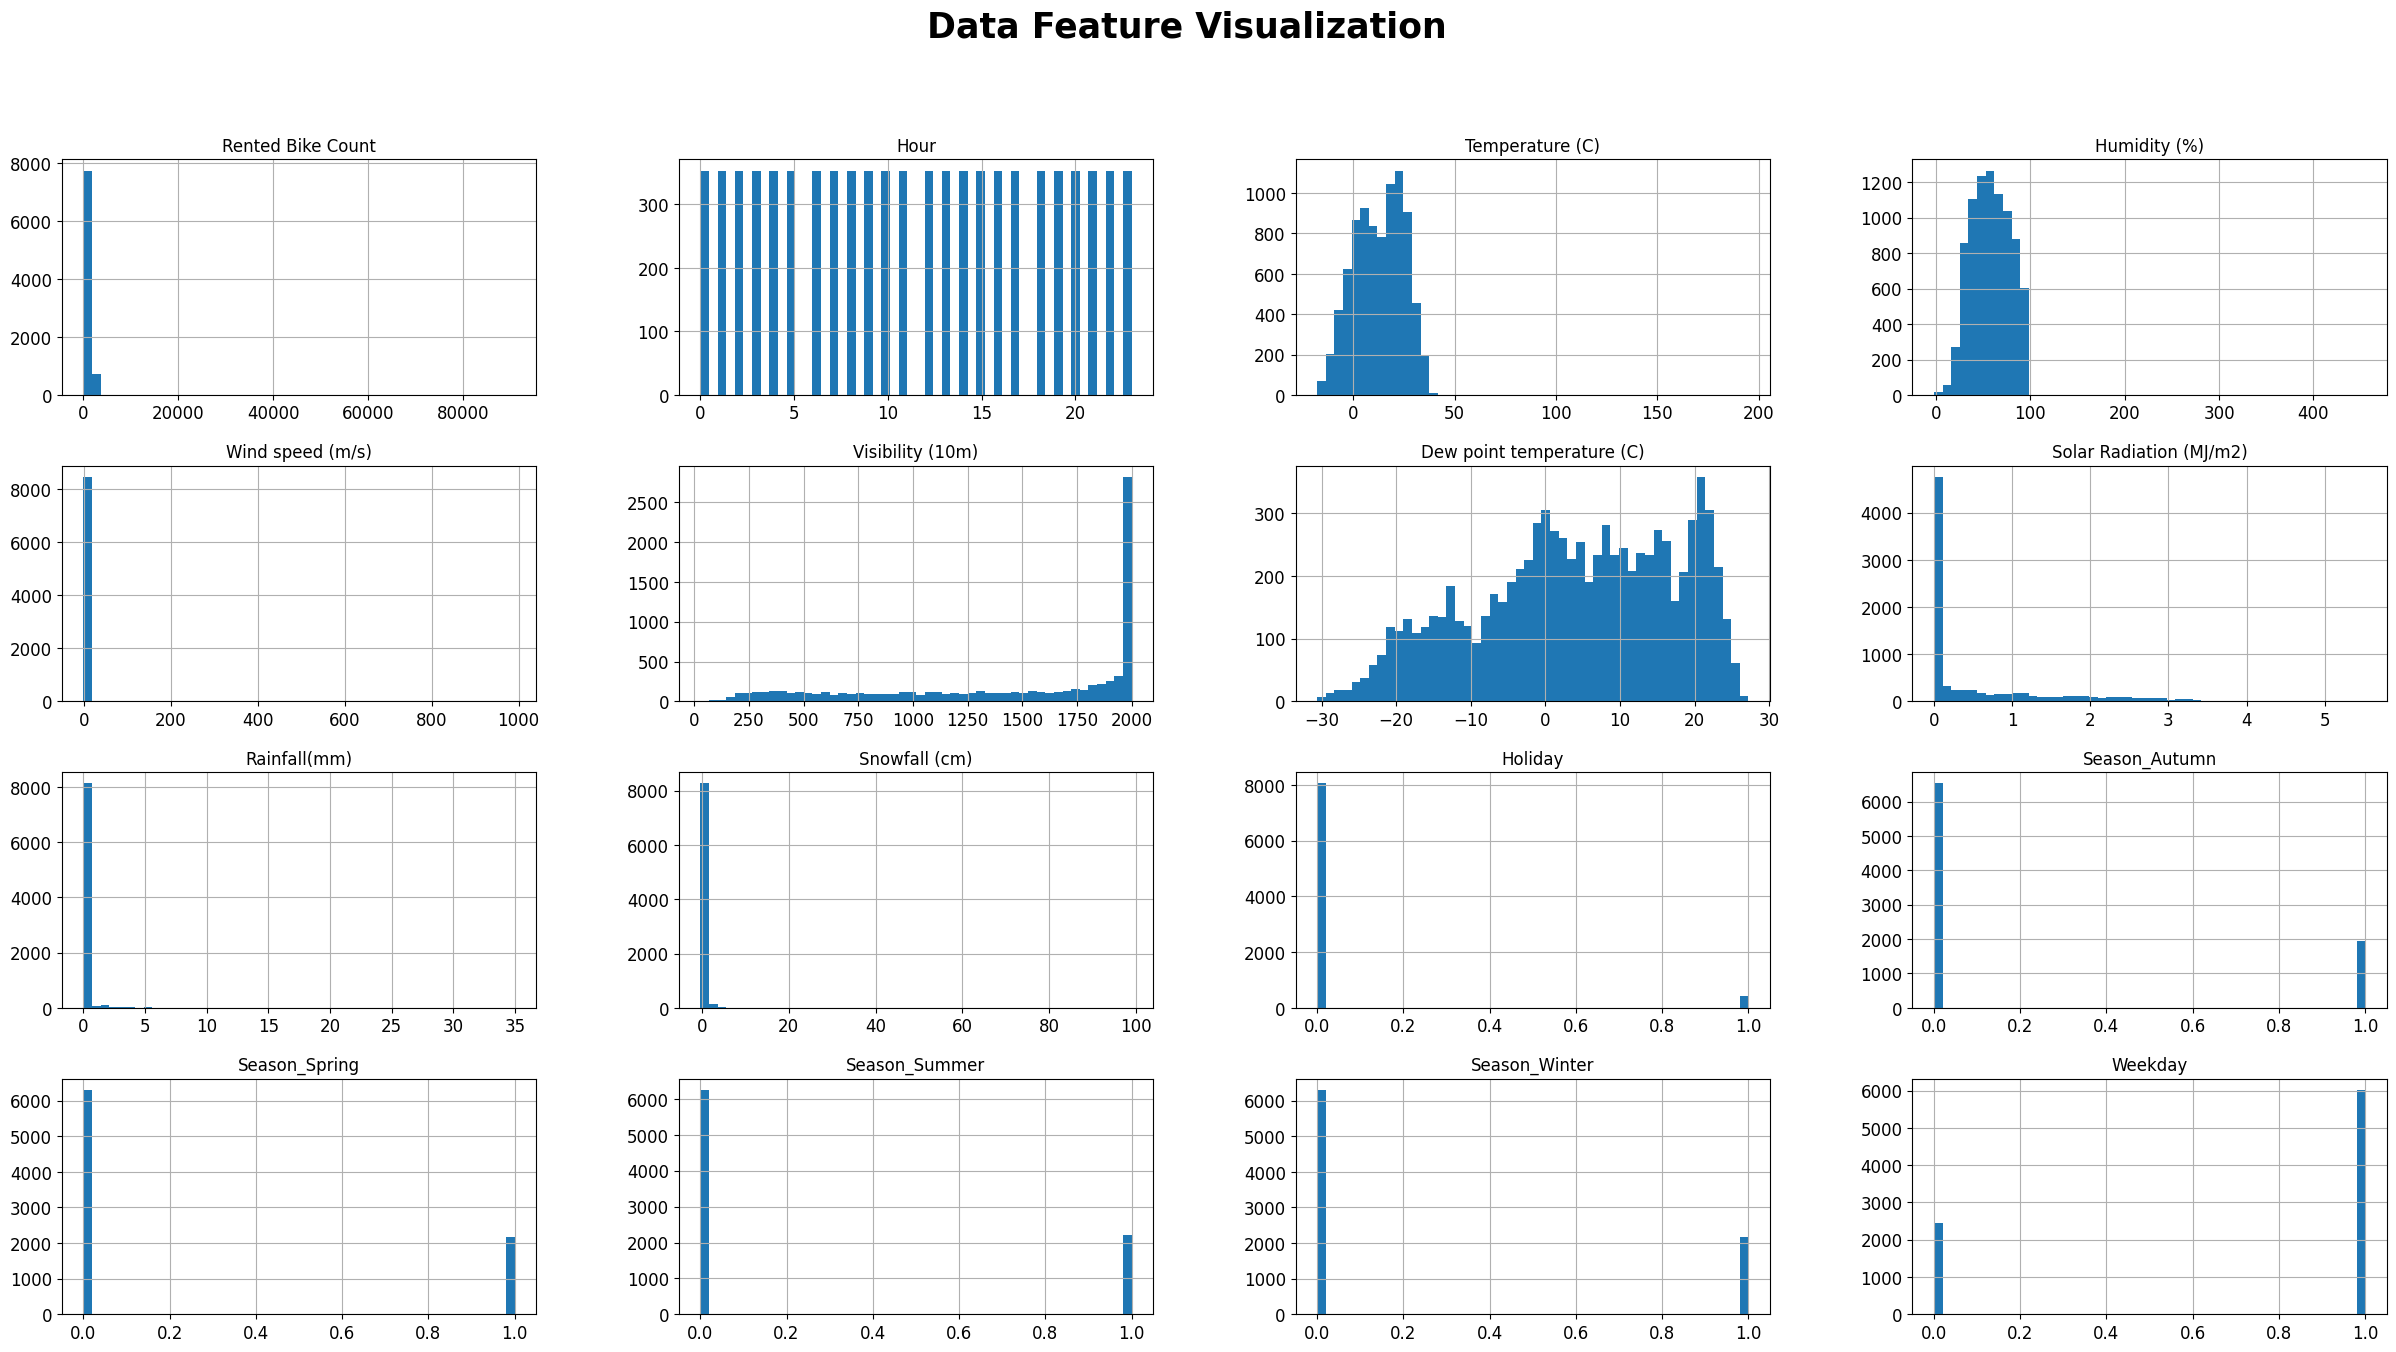

In [20]:
# Display the data feature visualisation after the requirements
data.hist(bins = 50, figsize = (30, 15))
plt.suptitle("Data Feature Visualization", fontsize = 25, fontweight = 'bold')
plt.show()

In [21]:
# Statistical summary of the dataset
data.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Weekday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8444.000000,8444.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,739.789014,11.507029,12.836090,58.190408,1.854247,1433.873479,3.944997,0.567771,0.149491,0.089507,0.048198,0.228825,0.255168,0.260839,0.255168,0.711636
std,1172.685973,6.920899,12.545382,20.943092,10.847528,609.051229,13.242399,0.868830,1.126914,1.164716,0.214198,0.420101,0.435982,0.439118,0.435982,0.453028
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the given histograms and statistical descriptions, the key observations are:

- The features **"Hour", "Dew point temperature", "Seasons", "Holiday"**, and **"Weekday"** do not exhibit obvious outliers, as their distributions are either normally distributed or they are originally categorical variables.
- The **Rented Bike Count** feature appears to have some outlier or erroneous values. While the majority of the values are less than 10,000, the maximum value is 90,997, which is significantly higher.
- Several features, including **Temperature (C)", "Humidity (%)", "Wind speed (m/s)", "Visibility (10m)", "Solar Radiation (MJ/m2)", "Rainfall(mm)**, and **Snowfall (cm)**, have highly skewed distributions, suggesting the presence of potential outliers or errors.

So the next step is to analyze the box plots and sorted data values for these features.

#### 1.2e Identify and fix any outliers and errors in the data.

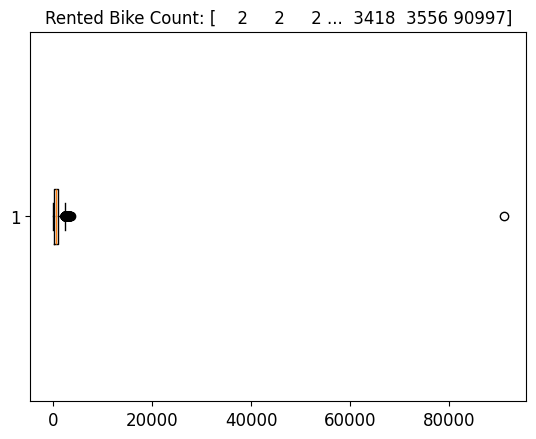

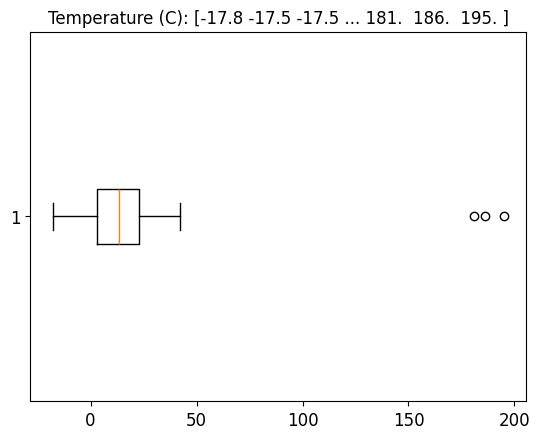

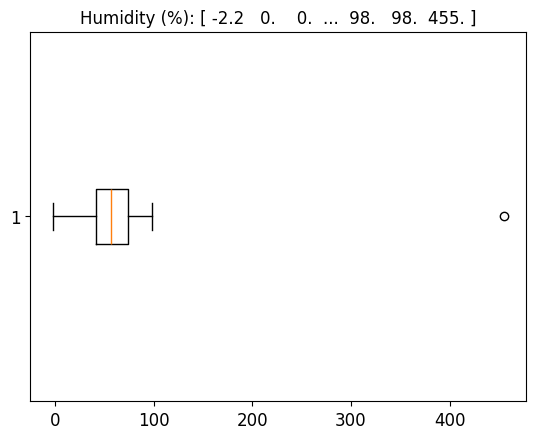

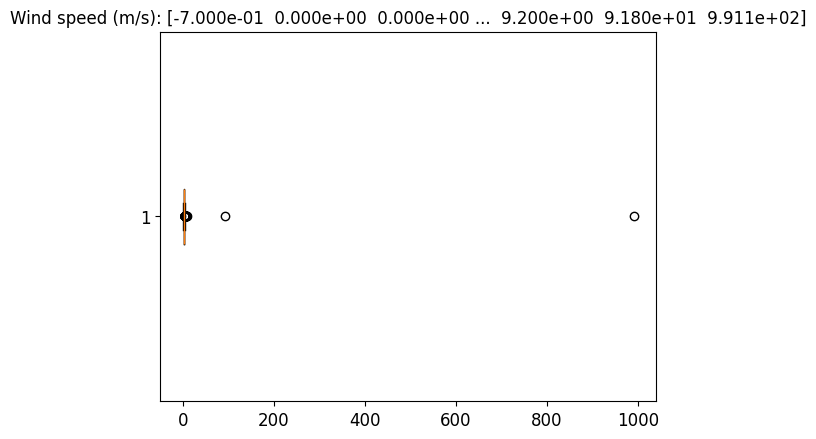

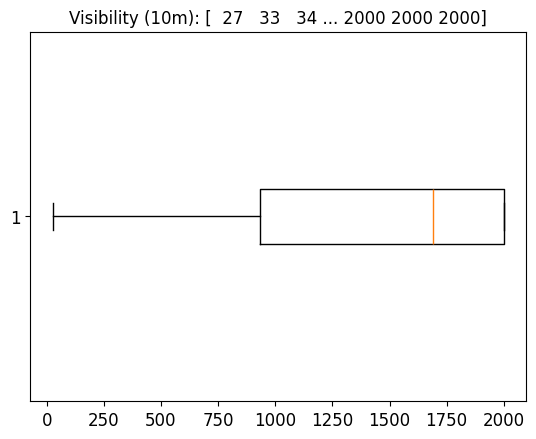

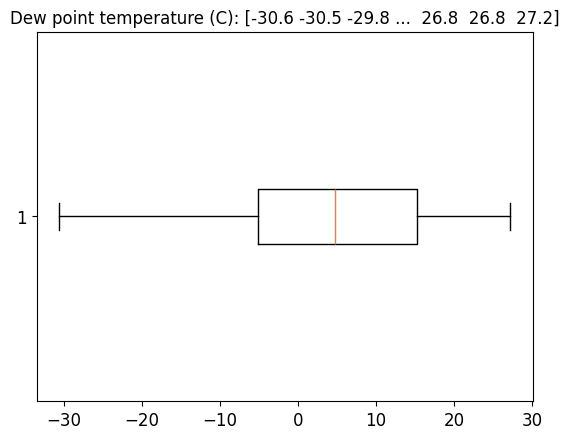

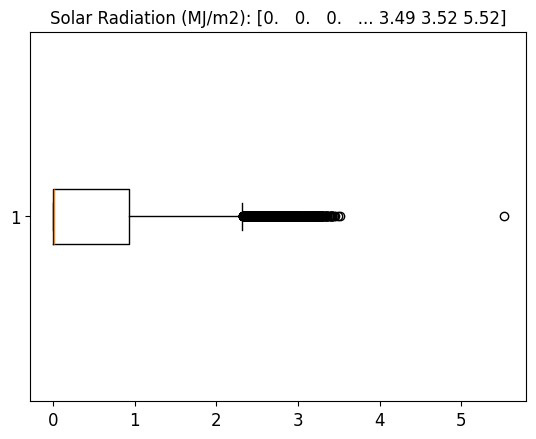

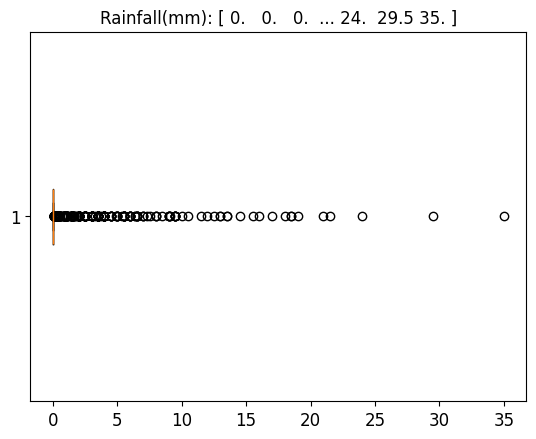

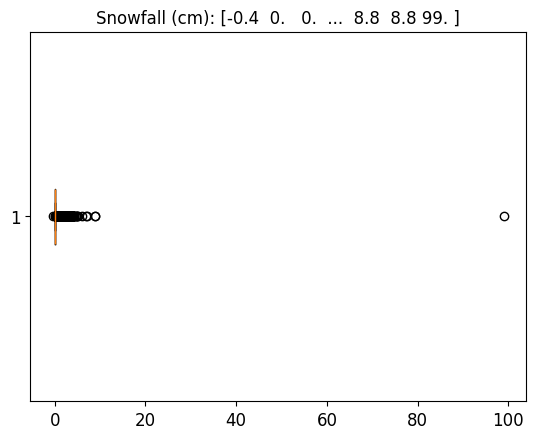

In [22]:
possible_columns_detected_outliers = ['Rented Bike Count','Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for feat in possible_columns_detected_outliers:
    plt.boxplot(data[feat].dropna(),vert=False)
    plt.title(f'{feat}: {np.sort(data.loc[:,feat].dropna())}')
    plt.show()

**From the outliers detected above, we have:**

- Rented Bike Count: The highest recorded value for this feature is 90,997, which is far greater than the next highest value of 3,556, clearly identifying it as an outlier. To handle this, we should set any values above 10,000 to NaN.

- Temperature (°C): Apart from the three highest values (181, 186, and 195), all temperature readings are under 100°C. These three are clear outliers, so we should replace any temperature values over 100°C with NaN.

- Humidity (%): There is one value above 100%, which is incorrect since humidity is measured as a percentage and should not exceed 100. Therefore, any humidity reading over 100% should be replaced with NaN.

- Wind Speed (m/s): All wind speed readings are under 10 m/s except for two exceptionally high values. These two are outliers, so any wind speed over 10 m/s should be set to NaN.

- Solar Radiation (MJ/m²): Most readings are zero, and all other values are below 4 MJ/m² except for the highest value of 5.52 MJ/m², marking it as an outlier. Therefore, any solar radiation value above 4 MJ/m² should be replaced with NaN.

- Snowfall (cm): There is one extremely high value of 99 cm, which stands out as an outlier because it is much larger than the other readings and unrealistic for daily snowfall. Consequently, any snowfall value above 10 cm should be set to NaN.

- Rainfall (mm), Visibility (10m): These features do not have any apparent outliers.

In [23]:
# Fixing the data that is outlier to nan value
data.loc[data['Rented Bike Count'] > 10000, 'Rented Bike Count'] = np.nan
data.loc[data['Temperature (C)'] > 100, 'Temperature (C)'] = np.nan
data.loc[data['Humidity (%)'] > 100, 'Humidity (%)'] = np.nan
data.loc[data['Wind speed (m/s)'] > 10, 'Wind speed (m/s)'] = np.nan
data.loc[data['Solar Radiation (MJ/m2)'] > 4, 'Solar Radiation (MJ/m2)'] = np.nan
data.loc[data['Snowfall (cm)'] > 10, 'Snowfall (cm)'] = np.nan

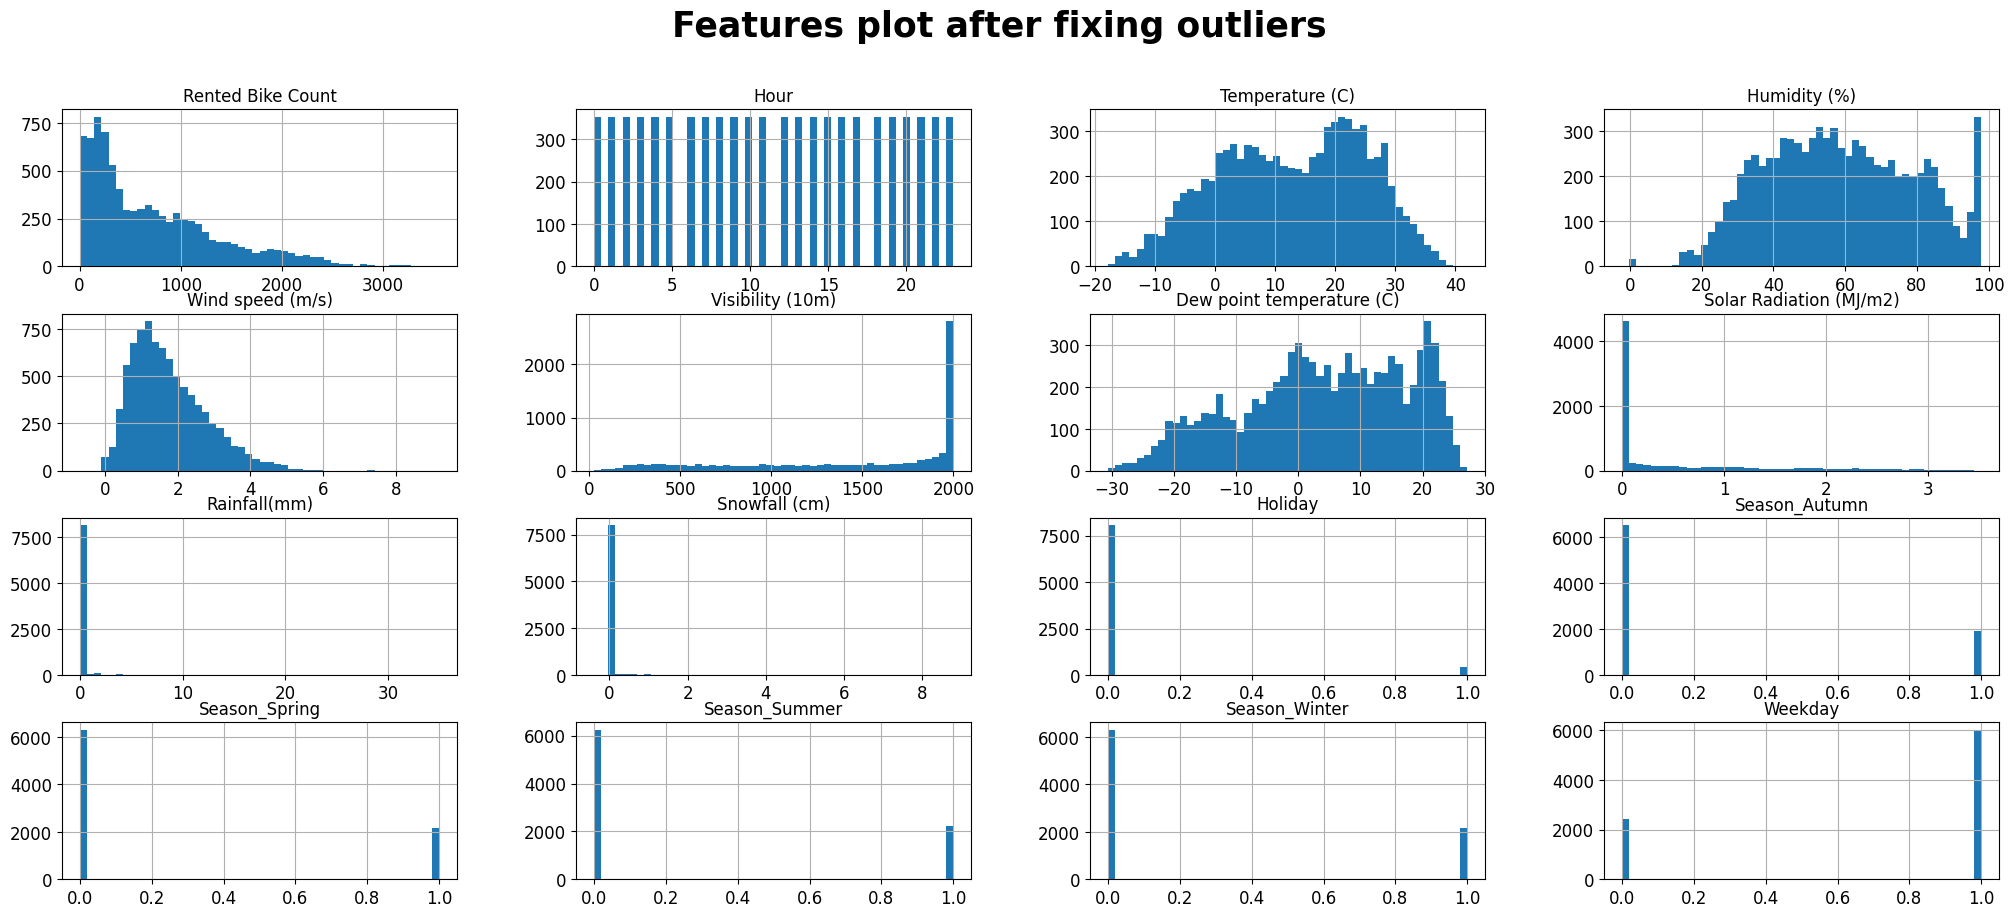

In [24]:
# Plot after fixing
data.hist(bins = 50, figsize = (25, 10))
plt.suptitle('Features plot after fixing outliers', fontsize = 25, fontweight = 'bold')
plt.show()

**Save fixed data to a new file**

In [25]:
# Create a new CSV file and save data there
new_file_path = 'CleanedSeoulBikeData.csv'
data.to_csv(new_file_path, index=False)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [26]:
### Your code here
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
# Create a custom transformer
class BadWeatherTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, wind_thresh=5, visib_thresh=1000, rain_thresh=5):
        # thresholds to define bad weather
        self.wind_thresh = wind_thresh
        self.visib_thresh = visib_thresh
        self.rain_thresh = rain_thresh

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Check if X is a DataFrame and access by column names; otherwise, use column indices
        if isinstance(X, pd.DataFrame):
            wind_speed = X['Wind speed (m/s)']
            visibility = X['Visibility (10m)']
            rainfall = X['Rainfall(mm)']
        else:
            # Assuming the order of features is known and consistent:
            # wind speed, visibility, rainfall are the 1st, 2nd, 3rd columns respectively
            wind_speed = X[:, 0]
            visibility = X[:, 1]
            rainfall = X[:, 2]

        bad_weather = (wind_speed > self.wind_thresh) | \
                      (visibility < self.visib_thresh) | \
                      (rainfall > self.rain_thresh)
        return np.c_[X, bad_weather.astype(int)]

##### ***Explanation of the preprocessing chosen***
**Standard Scaler**: The reasons that the preprocessing is chosen because:
- Feature Scaling: StandardScaler normalizes features by removing the mean and scaling to unit variance, aiding in the performance and faster convergence of many machine learning algorithms. 
- Enhancing Model Performance: Algorithms sensitive to feature scale perform better when all features are on a similar scale. 
- Standardization vs. Normalization: Unlike MinMaxScaler, which limits features to a fixed range, StandardScaler allows for more flexibility by not bounding values, avoiding potential issues with models that assume normally distributed feature data.

**Custom Transformer** (`BadweatherTransformer`): The reason that this is created because:
Certain weather conditions like heavy rain or snow significantly may impact target variable. This transformer to flag days with bad weather
- Improving Model Interpretability: By engineering features that directly relate to intuitive real-world effects (like bad weather impacting rentals), the model's predictions become more interpretable. 
- Handling Non-linear Relationships: A custom transformer can create features that encapsulate these complex behaviors—such as flagging extremely bad weather conditions that disproportionately affect the outcome.

In [28]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Imputes any missing values with the median of the column
    ('bad_weather_indicator', BadWeatherTransformer()),  
    ('scaler', StandardScaler())  # Scales the data
])


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into features and target
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

***Here comes a problem***

The pipeline
``` python
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Imputes any missing values with the median of the column
    ('bad_weather_indicator', BadWeatherTransformer()),  
    ('scaler', StandardScaler())  # Scales the data
])
```
During this process, the pipeline works in the process of handling all the imputation on target value (`Rented Bike Count`) (calculate the median and before moving the `BadweatherTransformer`, it replaces all the NaN values with the median and the cycles will repeat till the end of the Standard scaler). ***All in all, the pipeline only works on X-axis (target value), not on the y-axis values.*** 

Since in the end, we need to measure the performance of the model. Morever, if there are missing values in y_train, they need to be handled independently before fitting the pipeline. The same applies to y_test—we should impute its missing values as well. It's important not to perform imputation before splitting the data because doing so could cause data from the test set to leak into the training set. This leakage could boost the model's performance metrics, as the model would have access to information from the test set during training.

So the next step, we should check the Nan values in both y-train and y-test and we decide whether we need to impute or not

In [30]:
# Check the number of nan values in y_train and y_test
print(f"There are {y_train.isna().sum()} NaN values in y_train")
print(f"There are {y_test.isna().sum()} NaN values in y_test")

There are 0 NaN values in y_train
There are 1 NaN values in y_test


There are 1 nan value in y_test. So we need to impute the y-axis with the median. 

In [31]:
# Create the imputer (replace with median)
y_imputer = SimpleImputer(strategy="median")

# Fit and transform on y_train (Since it is not a pipeline so it cannot 'transform' itself, we use .fit_transform())
y_train = y_imputer.fit_transform(y_train.to_numpy().reshape(-1,1))

# Transform y_test (avoid data leakage)
y_test = y_imputer.transform(y_test.to_numpy().reshape(-1,1))

# Convert y back to pandas Series with correct index
y_train = pd.Series(y_train.flatten(), index= X_train.index, name="Rented Bike Count")
y_test = pd.Series(y_test.flatten(), index= X_test.index, name="Rented Bike Count")

Now we can fit the pipeline on X-train, y-train, X-test, y-test. Before that, a final pipeline for Linear Regression should be created

In [32]:
from sklearn.linear_model import LinearRegression
new_pipeline = Pipeline([('preprocessing_pipeline', pipeline),
                         ('regressor', LinearRegression())
                         ])

Also, to measure the performance of the model, we have RSME value to indicate the performance of the working model

In [33]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    """
    Calculate and print the RMSE for model predictions and the baseline prediction.

    Parameters:
    - y_true: array-like of shape (n_samples,), True target values.
    - y_pred: array-like of shape (n_samples,), Model predictions.

    Returns:
    - None
    """
    # Calculate the RMSE for the model predictions
    model_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'Model RMSE: {model_rmse}')

    # Calculate the baseline RMSE using the mean of the training targets
    baseline_pred = np.full_like(y_true, y_true.mean())
    baseline_rmse = np.sqrt(mean_squared_error(y_true, baseline_pred))
    print(f'Baseline RMSE: {baseline_rmse}')

In [34]:
# Fit the pipeline to the training data
new_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('bad_weather_indicator',
                                  BadWeatherTransformer()),
                                 ('scaler', StandardScaler())])),
                ('regressor', LinearRegression())])

In [35]:
# Predict on the training data
y_train_pred = new_pipeline.predict(X_train)

In [36]:
# Test RSME of the model
calculate_rmse(y_train, y_train_pred)

Model RMSE: 437.25706636546636
Baseline RMSE: 646.170499547999


## Step 3: Hyper-parameter optimisation



In [37]:
# Import the necessary libraries
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer

In [38]:
# Set up the pipeline for SVR (combine the preprocessed pipeline and the SVR)
SVR_pipeline = Pipeline([('preprocessing_pipeline', pipeline),
                         ('regressor', SVR())
                         ])

In [39]:
# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [40]:
# Set up 10-fold cross-validation
# Define the 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10 fold cross validation on linear regression and svr
lr_scores = cross_val_score(new_pipeline, X_train, y_train, cv=kf, scoring=rmse_scorer)
svr_scores = cross_val_score(SVR_pipeline, X_train, y_train, cv=kf, scoring=rmse_scorer)

# Print the results out
print("Linear Regression RMSE: Mean =", -np.mean(lr_scores), "Std =", np.std(lr_scores))
print("Support Vector Regression RMSE: Mean =", -np.mean(svr_scores), "Std =", np.std(svr_scores))

Linear Regression RMSE: Mean = 438.607413316176 Std = 15.282936651618455
Support Vector Regression RMSE: Mean = 540.6842342174804 Std = 23.467166668456496


In [41]:
# Grid Search for Linear Regression
# Hyperparameter tuning for Linear Regression
lr_params = {'regressor__fit_intercept': [True, False]}

# Gridsearch and print the best parameter components
lr_grid = GridSearchCV(new_pipeline, lr_params, cv=kf, scoring=rmse_scorer)
lr_grid.fit(X_train, y_train)
print('Best parameter LR:', lr_grid.best_params_)

# Grid Search for Support Vector Regression
# Hyperparameter tuning for Support Vector Regression
svr_params = {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear','rbf', 'poly'], 'regressor__gamma': ['scale', 'auto']}

# Gridsearch and print the best parameter components
svr_grid = GridSearchCV(SVR_pipeline, svr_params, cv=kf, scoring=rmse_scorer)
svr_grid.fit(X_train, y_train)
print('Best parameter SVR:', svr_grid.best_params_)

Best parameter LR: {'regressor__fit_intercept': True}
Best parameter SVR: {'regressor__C': 10, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}


In [42]:
# Display the RSME for the optimized Linear Regression
lr_cv_results = lr_grid.cv_results_
lr_rmse_mean = -lr_cv_results['mean_test_score'][lr_grid.best_index_]  # Negate to correct the sign
lr_rmse_std = lr_cv_results['std_test_score'][lr_grid.best_index_]
print("Optimized Linear Regression:\n","Best parameter:\n", lr_grid.best_params_, "\n", "Best score:\n", -lr_grid.best_score_,"\n", "Mean =", lr_rmse_mean, "Std =", lr_rmse_std)

# Display the RSME for the optimized Support Vector Regression
svr_cv_results = svr_grid.cv_results_
svr_rmse_mean = -svr_cv_results['mean_test_score'][svr_grid.best_index_]  # Negate to correct the sign
svr_rmse_std = svr_cv_results['std_test_score'][svr_grid.best_index_]
print("Optimized Support Vector Regression:\n","Best parameter:\n", svr_grid.best_params_, "\n", "Best score:\n", -svr_grid.best_score_,"\n", "Mean =", svr_rmse_mean, "Std =", svr_rmse_std)

Optimized Linear Regression:
 Best parameter:
 {'regressor__fit_intercept': True} 
 Best score:
 438.607413316176 
 Mean = 438.607413316176 Std = 15.282936651618455
Optimized Support Vector Regression:
 Best parameter:
 {'regressor__C': 10, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'} 
 Best score:
 397.41995958041986 
 Mean = 397.41995958041986 Std = 14.799214870179378


In [43]:
# ChatGPT did not give me the following lines

# Compare and choose the best model
if -lr_grid.best_score_ < -svr_grid.best_score_:
    model_chosen = lr_grid.best_estimator_
else:
    model_chosen = svr_grid.best_estimator_

# Fit the model on the train data
model_chosen.fit(X_train, y_train)

# Fit the preprocessing on the test data
pipeline.fit(X_test, y_test)
# Perform the prediction on test data
y_pred_test = model_chosen.predict(X_test)

# RSME for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test RMSE of the Best Model: {test_rmse:.2f}')


Test RMSE of the Best Model: 367.97


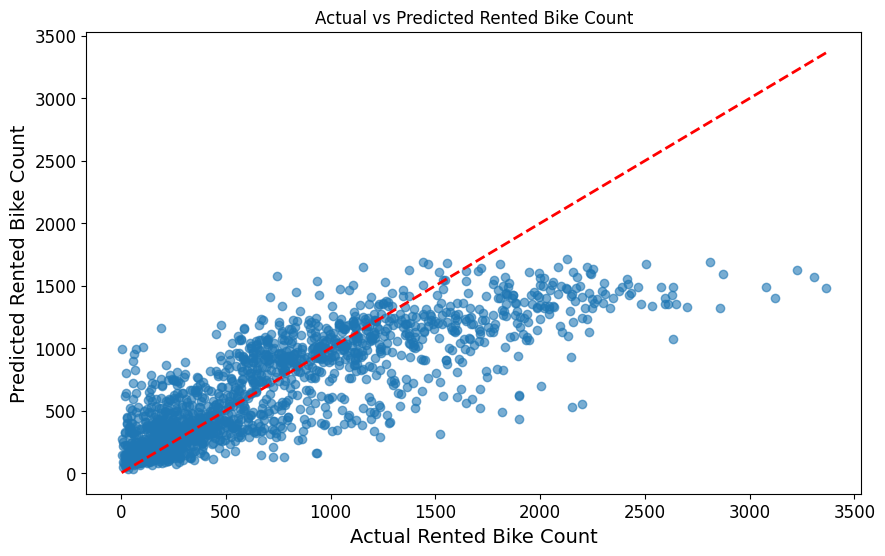

In [44]:
# Visualize the results compared between y-test and y-pred-test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count')
plt.show()


Upon examining the scatterplot comparing predicted values against actual values for rented bike counts, it is observed that most data points cluster near the y=x line, indicating that predictions are generally close to actual values. However, the model tends to underpredict especially when actual rented bike counts exceed 2000. This suggests potential areas for improvement. Further model tuning, additional data collectionmight be necessary to enhance prediction accuracy for higher ranges of bike counts.

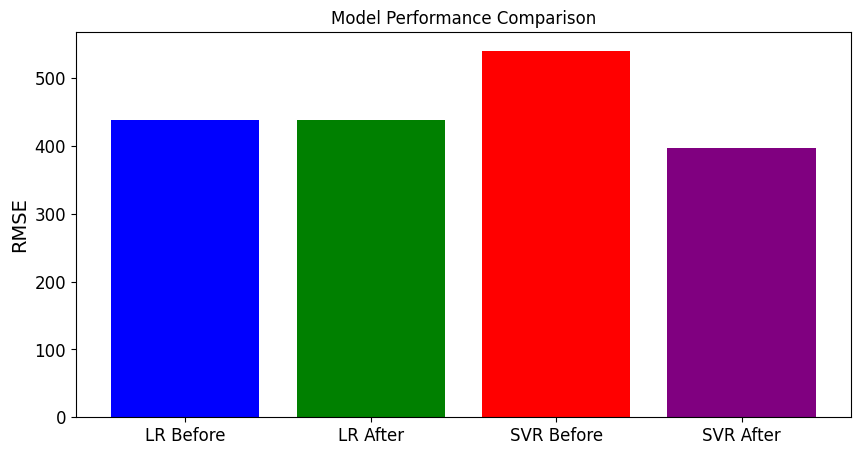

In [45]:
# Visualise comparison of each model
models = ['LR Before', 'LR After', 'SVR Before', 'SVR After']
means = [-np.mean(lr_scores), -lr_grid.best_score_, -np.mean(svr_scores), -svr_grid.best_score_]

plt.figure(figsize=(10, 5))
plt.bar(models, means, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.show()


After conducting 10-fold cross-validation and GridSearch to fit the best parameters, it is evident that the Support Vector Regression (SVR) with a mean RMSE of 397.41 outperforms Linear Regression, which has a mean RMSE of 438.53. This indicates that SVR is more effective for our dataset. Consequently, SVR has been selected as the superior model, particularly with the optimal parameters of C: 10, gamma: scale, and kernel: rbf. Notably, the test RMSE for SVR is even lower than the mean cross-validation RMSE, suggesting that the model generalizes well without significant signs of overfitting.